<a href="https://colab.research.google.com/github/blandersonw/MachineLearning/blob/main/HW9_BlakeAnderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this homework you will try out semi-supervised learning using K-Means as we did in the lecture.

Use the seed 0 everywhere.

1. Import MNIST data as we did in Lecture 7. We are only going to use digits 0 and 1. So extract only those examples and discard the rest.

Next, randomly split the data into 80% training data and 20% testing data. Keep this split fixed throughout the experiments.

2. For each K in Ks=[10,20,30], follow the steps in the lecture:

Step 1. 
Cluster the training set into K clusters.
Then for each cluster, find the image closest to the centroid, called the representative images.
Plot the K representative images and manually label these images.
Train Logistic Regression with K training examples.
Report the training and the test accuracy.

Step 2. 
Assign the labels of all instances based on the labels of the cluster centers (i.e., representative images).
Train Logistic Regression with all training data using the propagated labels. 
Report the training and the test accuracy.

3. Comment on the observed performance for the different values of K.

In [1]:
#importing mnist

import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [2]:
#Splitting mnist based on data and targets (x,y)
X,y = mnist['data'], mnist['target']

#Filtering mnist for only 0 and 1
filter = np.where((y == 0 ) | (y == 1))
X,y = X[filter], y[filter]

In [3]:
from sklearn.model_selection import train_test_split

#splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)

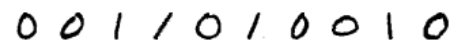

representative images for 10 clusters

Logistic regression train score is 0.9965324763193505, test score is 0.9962787550744249

Logistic regression train labeled score is 0.9978856562922869, test labeled score is 0.9976319350473613



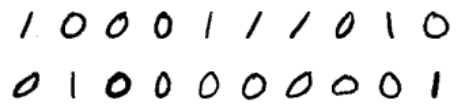

representative images for 20 clusters

Logistic regression train score is 0.9972936400541272, test score is 0.9969553450608931

Logistic regression train labeled score is 0.9983085250338295, test labeled score is 0.9979702300405954



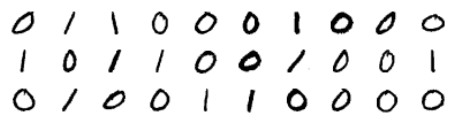

representative images for 30 clusters

Logistic regression train score is 0.9968707713125846, test score is 0.9972936400541272

Logistic regression train labeled score is 0.9986468200270636, test labeled score is 0.9972936400541272



In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Ks we will be using
Ks = [10,20,30]

def run_hw9(k):

  #finding the representative images by splitting into kmeans, and then performing a kmeans fit and transform on training data
  kmeans = KMeans(n_clusters = k, random_state = 0)
  X_digits_dist = kmeans.fit_transform(X_train)
  representative_digit_idx = np.argmin(X_digits_dist, axis=0)

  #assigning the nearest representative images
  X_representative_digits = X_train[representative_digit_idx]
  y_representative_digits = y_train[representative_digit_idx]

  #plotting representative images
  plt.figure(figsize=(8, 2))
  for index, X_representative_digit in enumerate(X_representative_digits):
      plt.subplot(k // 10, 10, index + 1)
      plt.imshow(X_representative_digit.reshape(28, 28), cmap="binary", interpolation="bilinear")
      plt.axis('off')

  plt.show()

  #titling graph
  print(f"Representative images for {k} clusters\n")

  #performing logistic regression on the representative digits
  log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=0)
  log_reg.fit(X_representative_digits, y_representative_digits)

  #calculating test/train score with training / testing data
  train_score = log_reg.score(X_train, y_train)
  test_score = log_reg.score(X_test, y_test)

  #print result
  print(f"Logistic regression train score is {train_score}, test score is {test_score}\n")

  #creating the y training data propogation
  y_train_propagated = np.empty(len(X_train), dtype=np.int32)

  #iterating for the number of k
  for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

  #performing logistic regression on the x_train and y_train_propogated (labelled data now)
  log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=0)
  log_reg.fit(X_train, y_train_propagated)

  #calculating test/train score with training / testing data
  label_train_score = log_reg.score(X_train, y_train)
  label_test_score = log_reg.score(X_test, y_test)

  #print result
  print(f"Logistic regression train labeled score is {label_train_score}, test labeled score is {label_test_score}\n")

#running function for our Ks list
for k in Ks:
  run_hw9(k)
